In [1]:
# TODO: XOR 문제는  Chap 8끝난 이후에 해 볼 것임
# 활성화 함수
# 뉴런이 입력 받아 연산 결과를 다음 뉴련으로 전달할 때
# 임계점이 넘을 경우만 신호를 전달하는 체계
# Activation Function이라 한다
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Step Function')

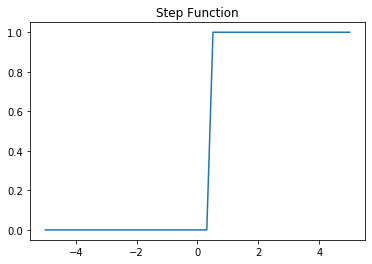

In [2]:
# 계단 함수 - 가장 단순한 형태
# 분기점을 넘으면 값이 증가
# 분기점에 도달하지 않으면 0 -> 출력하지 않는다
def step_function(x, threshold=0):
    # x =입력, threshold : 분기점
    return np.where(x <= threshold, 0, 1)

# 시각화를 위한 선형 공간 생성
x = np.linspace(-5, 5)
y = step_function(x, threshold = 0.5)

plt.plot(x, y)
plt.title("Step Function")

Text(0.5, 1.0, 'Sigmoid Function')

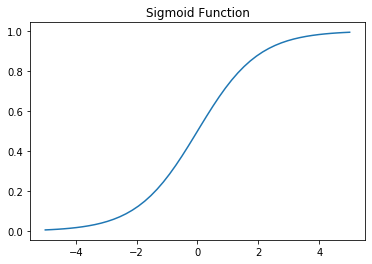

In [3]:
# sigmoid 함수
# Step 함수보다 부드러운 형태 : 실제와 좀 더 닮아 있다
# 단순하지만 전통적으로 널리 사용되온 함수
# 로지스틱 함수 라고 부르기도 한다
# 0 ~ 1 사이를 부드럽게 변화한다
# 신경망이 깊어지면 Gradient Vanishing 현상 발생
def sigmoid_funcion(x):
    # x 는 입력값
    return 1 / (1 +np.exp(-x))

sigmoid_y = sigmoid_funcion(x)
plt.plot(x, sigmoid_y)
plt.title("Sigmoid Function")

Text(0.5, 1.0, 'Hyperbolic Function')

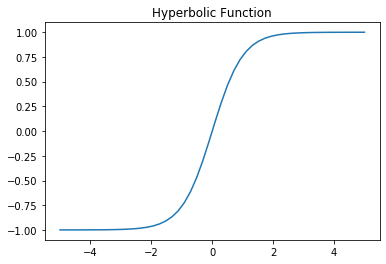

In [4]:
# tanh :하이퍼볼릭 탄젠트 함수
# sigmoid와 거의 비슷, 활성화 정도에 차이가 있다
def tanh_function(x):
    return np.tanh(x)

tanh_y =tanh_function(x)
plt.plot(x, tanh_y)
plt.title("Hyperbolic Function")

Text(0.5, 1.0, 'Relu Function')

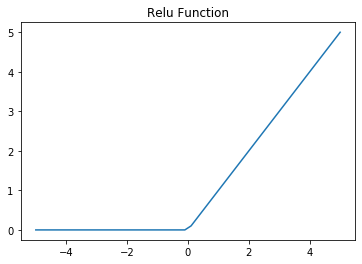

In [5]:
# RelU : Rectified Linear Unit
# x > 0 범위 내에서 우상향 성형 곡선을 그린다
# 최근 딥러닝에서 많이 활용되는 활성화 함수
def relu_function(x):
    return np.where(x <= 0, 0, x)

relu_y = relu_function(x)
plt.plot(x, relu_y)
plt.title("Relu Function")

Text(0.5, 1.0, 'Leaky Relu Function')

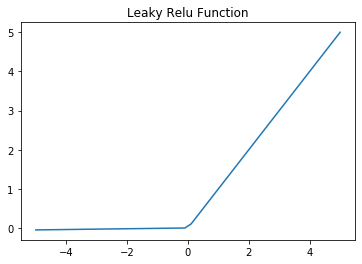

In [6]:
# Leaky Relu
# Relu 함수는 입력이 음수인 경우 출력이 0
# 전달되는 신호가 유실되므로 더이상 학습이 진행되지 않음
# -> dying Relu 현상
# 이 현상 해소를 위해 음수 영역에서 약간의 기울기를 만들어 낸다
def leaky_relu_function(x):
    return np.where(x <= 0, x*0.01, x)
leaky_relu_y = leaky_relu_function(x)
plt.plot(x, leaky_relu_y)
plt.title("Leaky Relu Function")

In [8]:
# Softmax
# 분류 문제를 다룰 때 적합한 함수
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

source = [1, 2, 3]
result = softmax_function(source)
print("SOFTMAX:", result)
print("SUM:", sum(result))

SOFTMAX: [0.09003057 0.24472847 0.66524096]
SUM: 1.0


출력:
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


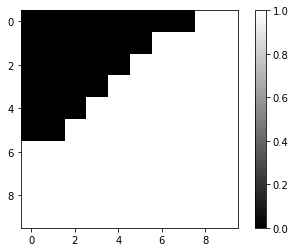

In [16]:
# 신경망을 활용한 XOR 문제 해결
# 좌표계 설정
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10)) #격자
w_x = 2.5 # x의 가중치
w_y = 3.0  # y의 가중치

bias = 2.0 # 편향
# 그리드 맵에 뉴런의 연산을 출력
for i in range(10):
    for j in range(10):
        # 입력과 가중치 곱 + 편향
        u = X[i] * w_x + \
            Y[j] * w_y + bias
        # 그리드 맵에 출력값 저장
#         y = sigmoid_funcion(u)
        y= step_function(u)
        
        Z[j][i] = y
        
print("출력:\n", Z)

# 그래프로 출력
plt.imshow(Z, # 이미지 출력용 데이터 
           "gray")# 컬러 맵
plt.colorbar()
plt.show()
# 검은색 영역은 출력이 0 -> 뉴런이 흥분하지 않은 상태
# 흰색 영역 -> 출력 1 -> 뉴런이 흥분한 상태
        
        

In [41]:
# 신경망을 중첩하면
# 어떤 분류든 가능해지게 된다
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

# 출력 저장소
Z = np.zeros((10, 10))
w_i_h = np.array([
    [3.0, 3.0],
    [3.0, 3.0]
])
w_h_0 = np.array([
    [1.0],
    [-1.0]
])
# 편향 
# 은닉층 편향
b_i_h = np.array([3.0, -3.0]) 
# 출력층을 위한 편향
b_h_o = np.array([1.0])

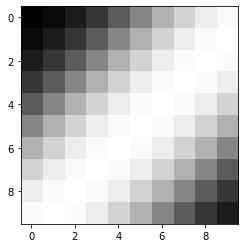

In [42]:
# 은닉층
def hidden_layer(x, w, b):
    u = np.dot(x, w) + b
    return sigmoid_funcion(u)
#출력층
def output_layer(x, w, b):
    u = np.dot(x, w) +b
    return u

# 그리드 맵의 각 그리드별 신경망 연산 수행
for i in range(10):
    for j in range(10):
        # 순전파
        inp = np.array([X[i], Y[j]]) #입력층
        hid = hidden_layer(inp, w_i_h, b_i_h) # 은닉층
        out = output_layer(hid, w_h_0, b_h_o) # 출력층
        
        # 그리드 맵에 신경망 출력값 저장
        Z[j][i] = out[0]
      
    # 출력
# print("GRID:\n", Z)
# 그리드 맵으로 출력
plt.imshow(Z, "gray")